In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

invoice_df = pd.read_csv('data/invoice_train.csv')
client_df = pd.read_csv('data/client_train.csv')



/var/folders/t8/wfwm575525v6fcfsxf1vthj00000gn/T/ipykernel_1948/921748239.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_df = pd.read_csv('data/invoice_train.csv')


In [2]:
# From invoice_df table, extract client_id and tarif_type
tarif_data = invoice_df[['client_id', 'tarif_type']].copy()

# Triff mode aggregation - if there are multiple, select the lower value
client_tarif = tarif_data.groupby('client_id')['tarif_type'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None
).reset_index()



In [8]:
# Merge data
merged_data = client_tarif.merge(client_df[['client_id', 'target']], on='client_id', how='inner')

# Missing value check 
print("\nMissing Value:")
print(merged_data.isna().sum())


Missing Value:
client_id     0
tarif_type    0
target        0
dtype: int64


In [4]:

X = merged_data[['tarif_type']]
y = merged_data['target']

# To string 
X['tarif_type'] = X['tarif_type'].astype(str)



/var/folders/t8/wfwm575525v6fcfsxf1vthj00000gn/T/ipykernel_1948/4168535588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tarif_type'] = X['tarif_type'].astype(str)


In [5]:

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_results = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
})



In [6]:
# order
mi_results = mi_results.sort_values('MI_Score', ascending=False).reset_index(drop=True)

print(mi_results)



      Feature  MI_Score
0  tarif_type  0.016532


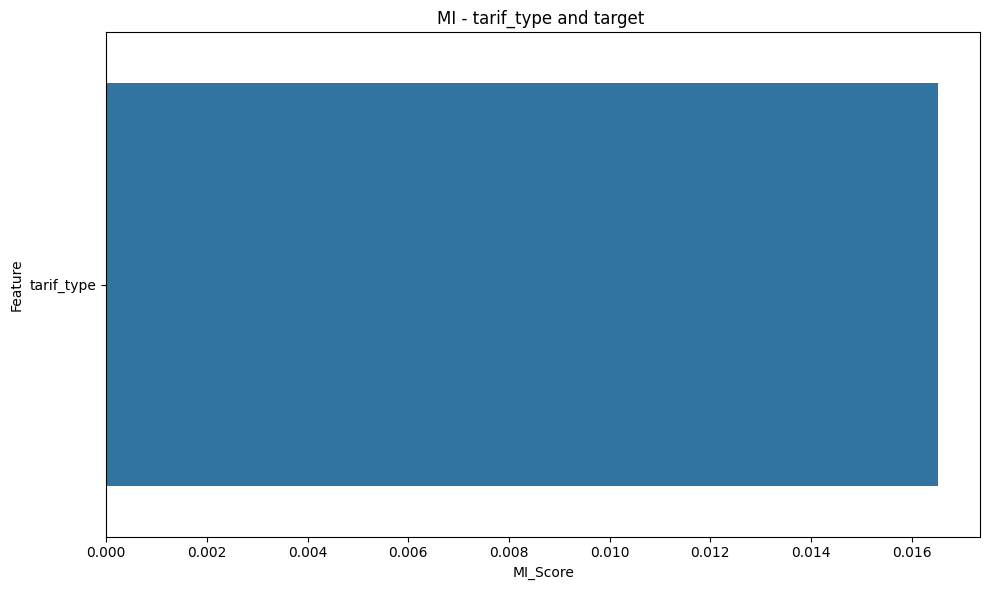

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='MI_Score', y='Feature', data=mi_results)
plt.title('MI - tarif_type and target ')
plt.tight_layout()
plt.show()

